In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
# !pip3 install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.0+cu118 -f https://download.pytorch.org/whl/torch_stable.html

!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/index.html

In [ ]:
# !sudo apt-get install python3.7
# !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

!python3 --version

Python 3.10.12


In [ ]:

!pip install ipywidgets tqdm imageio-ffmpeg ninja matplotlib numpy opencv-python prettytable -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 418.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/homework/CIS5810/Final_Project NST/MM_Generations

/content/drive/MyDrive/Colab Notebooks/homework/CIS5810/Final_Project NST/MM_Generations


In [ ]:
# !git clone https://github.com/open-mmlab/mmgeneration.git

In [ ]:
import os
os.chdir('mmgeneration')

In [ ]:
!pip install -r requirements.txt
!pip install -v -e .

In [ ]:
import torch, torchvision

import mmcv

from mmgen.apis import init_model, sample_unconditional_model

print('mmgen!！')

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


mmgen!！


In [ ]:
!python -c 'import torch;print(torch.__version__);print(torch.version.cuda)'
print(mmcv.__version__)


1.11.0+cu113
11.3
1.7.1


In [ ]:
# config_file = 'configs/styleganv2/stylegan2_c2_lsun-church_256_b4x8_800k.py'

# checkpoint_file = 'https://download.openmmlab.com/mmgen/stylegan2/official_weights/stylegan2-church-config-f-official_20210327_172657-1d42b7d1.pth'

# model = init_model(config_file, checkpoint_file, device='cuda:0')

# fake_imgs = sample_unconditional_model(model, 4)

In [ ]:
# fake_imgs.shape

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# def imshow(img_tensor):
#     # Convert from (channels, height, width) to (height, width, channels)
#     np_img = img_tensor.numpy().transpose(1, 2, 0)

#     # Scale the pixel values back to the range [0, 1] if they're not
#     np_img = np_img / np_img.max()

#     # Plot the image
#     plt.imshow(np_img)
#     plt.show()

# # Assuming 'images' is your batch of images with shape torch.Size([4, 3, 256, 256])
# for i in range(fake_imgs.shape[0]):
#     imshow(fake_imgs[i])

# Video Transfer

In [ ]:
# import mmcv
# from mmgen.apis import init_model, sample_img2img_model

# import cv2

# import numpy as np
# import matplotlib.pyplot as plt
# import time


# def show_img_from_path(img_path):
#     '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
#     img_BGR = cv2.imread(img_path)
#     img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
#     plt.imshow(img_RGB)
#     plt.show()

In [ ]:
def gen_vis_fake_img(input_path, output_path='outputs/F1/', target_domain='winter', figsize=15, frame_id=0):

    input_img = cv2.imread(input_path)

    fake_imgs = sample_img2img_model(model, input_path, target_domain=target_domain)
    img_size = fake_imgs.shape[2]

    RGB = np.zeros((img_size, img_size, 3))
    RGB[:,:,0] = fake_imgs[0][2]
    RGB[:,:,1] = fake_imgs[0][1]
    RGB[:,:,2] = fake_imgs[0][0]
    RGB = cv2.resize(RGB, dsize=(input_img.shape[1],input_img.shape[0]))
    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    RGB = RGB.astype('uint8')
    # cv2.imwrite(output_path+target_domain+'_'+input_path.split('/')[-1], cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))

    plt.figure(figsize=(figsize, figsize))
    plt.subplot(1,2,1)
    plt.title('input')
    input_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(input_RGB)

    plt.subplot(1,2,2)
    plt.title(target_domain)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(RGB)

    # plt.show()
    plt.savefig(f"data/{temp_dir}/{frame_id:06d}.jpg")

In [ ]:

# config_file = 'configs/cyclegan/cyclegan_lsgan_resnet_in_summer2winter_b1x1_250k.py'
# checkpoint_file = 'https://download.openmmlab.com/mmgen/cyclegan/refactor/cyclegan_lsgan_resnet_in_1x1_246200_summer2winter_convert-bgr_20210902_165932-fcf08dc1.pth'

# img_size = 400

# model = init_model(config_file, checkpoint_file, device='cuda:0')

In [ ]:
# import time
# name = 'red3'
# input_video = 'data/{}.mp4'.format(name)
# season = 'summer'
# temp_dir = time.strftime('%Y%m%d%H%M%S')

# if os.path.exists('data/{}'.format(temp_dir)):
#     pass
# else:
#     os.mkdir('data/{}'.format(temp_dir))
#     print('saving in {}'.format(temp_dir))

# # input_video = 'data/tongji_video.mp4'

# imgs = mmcv.VideoReader(input_video)
# prog_bar = mmcv.ProgressBar(len(imgs))

# for frame_id, img in enumerate(imgs):
#     cv2.imwrite('temp.jpg', img)
#     gen_vis_fake_img('temp.jpg', target_domain = season, figsize=15, frame_id=frame_id)
#     prog_bar.update()

# mmcv.frames2video('data/{}'.format(temp_dir), 'outputs/{}_{}_output.mp4'.format(name, season), fps=imgs.fps, fourcc='mp4v')

In [ ]:
ls

20231204010713/  configs/  LICENSE          model-index.yml  requirements.txt  tools/
20231204010858/  data/     LICENSES.md      outputs/         setup.cfg         work_dirs/
apps/            demo/     MANIFEST.in      README.md        setup.py
checkpoints/     docker/   mmgen/           README_zh-CN.md  temp.jpg
CITATION.cff     docs/     mmgen.egg-info/  requirements/    tests/


# Image Style Transfer - Vangogh


In [ ]:
# import mmcv
from mmgen.apis import init_model, sample_img2img_model

import cv2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/vangogh2photo.zip -O data/vangogh2photo.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/monet2photo.zip -O data/monet2photo.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/cezanne2photo.zip -O data/cezanne2photo.zip
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/dataset/ukiyoe2photo.zip -O data/ukiyoe2photo.zip

In [ ]:
# !unzip -o data/vangogh2photo.zip -d data/vangogh2photo/
# !unzip -o data/monet2photo.zip -d data/monet2photo/
# !unzip -o data/cezanne2photo.zip -d data/cezanne2photo/
# !unzip -o data/ukiyoe2photo.zip -d data/ukiyoe2photo/


In [ ]:
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/cyclegan_lsgan_resnet_in_facades_b1x1_80k_vangogh2photo.py -O configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_vangogh2photo.py
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/config/cyclegan_lsgan_resnet_in_facades_b1x1_80k_cezanne2photo.py -O configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_cezanne2photo.py
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/config/cyclegan_lsgan_resnet_in_facades_b1x1_80k_ukiyoe2photo.py -O configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_ukiyoe2photo.py
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/config/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py -O configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py

In [ ]:
config_file = 'configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_vangogh2photo.py'

# checkpoint_file = 'work_dirs/experiments/cyclegan_vangogh2photo/ckpt/cyclegan_vangogh2photo/latest.pth'
checkpoint_file = 'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_vangogh2photo_iter_80000.pth'

img_size = 256

In [ ]:
model_v = init_model(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.10/dist-packages/mmcv/cnn/bricks/conv_module.py:153: UserWarning: Unnecessary conv bias before batch/instance norm
  warnings.warn(


load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_vangogh2photo_iter_80000.pth


Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_vangogh2photo_iter_80000.pth" to /root/.cache/torch/hub/checkpoints/cyclegan_vangogh2photo_iter_80000.pth


  0%|          | 0.00/324M [00:00<?, ?B/s]

In [ ]:
input_path = 'data/memory/memory_san.jpg'

input_img = cv2.imread(input_path)

input_img.shape

fake_imgs = sample_img2img_model(model_v, input_path, target_domain='vangogh')
print(fake_imgs.shape)
img_size = fake_imgs.shape[2]
print(img_size)

torch.Size([1, 3, 256, 256])
256


In [ ]:
RGB = np.zeros((img_size, img_size, 3))
RGB[:,:,0] = fake_imgs[0][2]
RGB[:,:,1] = fake_imgs[0][1]
RGB[:,:,2] = fake_imgs[0][0]

RGB = cv2.resize(RGB, dsize=(input_img.shape[1],input_img.shape[0]))
print(RGB.shape)

RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
RGB = RGB.astype('uint8')

cv2.imwrite('outputs/F4_photo2vangogh.jpg', cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))

(2775, 3883, 3)


True

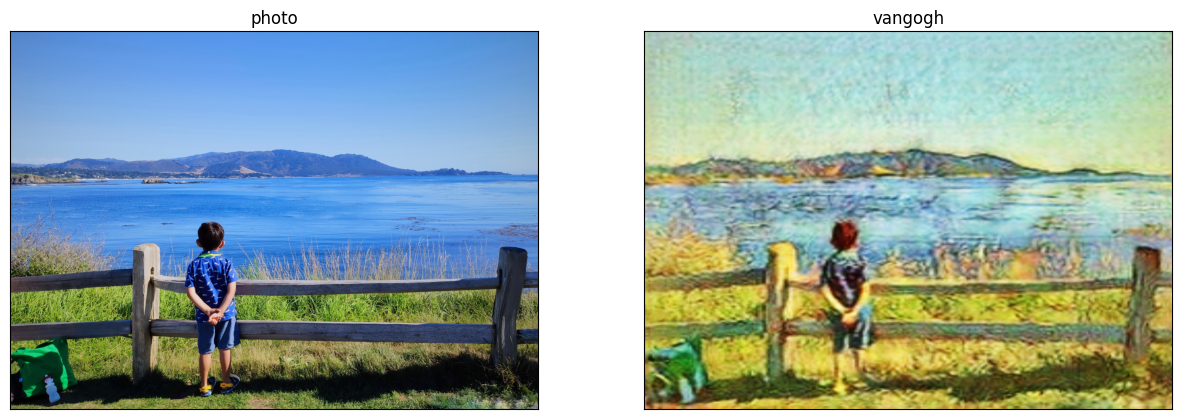

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.title('photo')
input_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(input_RGB)

plt.subplot(1,2,2)
plt.title('vangogh')
plt.xticks([])
plt.yticks([])
plt.imshow(RGB)

plt.show()

In [ ]:
def gen_vis_fake_img(input_path, model, target_domain='vangogh', figsize=15, save_path='outputs/F4_photo2vangogh.jpg'):
    input_img = cv2.imread(input_path)
    fake_imgs = sample_img2img_model(model, input_path, target_domain=target_domain)
    img_size = fake_imgs.shape[2]

    RGB = np.zeros((img_size, img_size, 3))
    RGB[:,:,0] = fake_imgs[0][2]
    RGB[:,:,1] = fake_imgs[0][1]
    RGB[:,:,2] = fake_imgs[0][0]
    RGB = cv2.resize(RGB, dsize=(input_img.shape[1],input_img.shape[0]))
    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    RGB = RGB.astype('uint8')

    if save_path:
        cv2.imwrite(save_path, cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))

    plt.figure(figsize=(figsize, figsize))
    plt.subplot(1,2,1)
    plt.title('input')
    input_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(input_RGB)

    plt.subplot(1,2,2)
    plt.title(target_domain)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(RGB)

    plt.show()

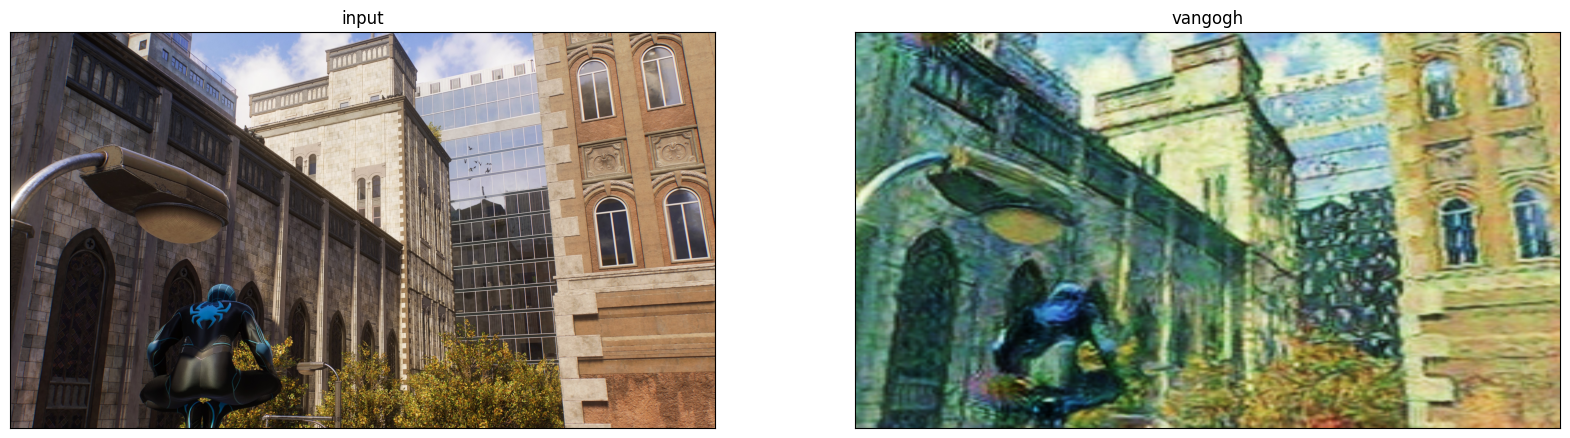

In [ ]:
name = 'IMG_1613'
style = 'vangogh'
model = model_v

gen_vis_fake_img('data/memory/{}.JPG'.format(name), model, target_domain=style, figsize=20, save_path='outputs/{}_{}.jpg'.format(name,style))

In [ ]:
import re
pattern = r'(.+?)\.jpg'
style = 'vangogh'
photo_path = 'data/memory'
# os.chdir(photo_path)
model_each = model_v

for each in os.listdir(photo_path):
    try:
      match = re.match(pattern, each, re.IGNORECASE)
      name = match.group(1)
      save_path = 'outputs/{}_{}.jpg'.format(name,style)
      print(each)
      if os.path.exists(save_path) == False:
        gen_vis_fake_img('{}/{}'.format(photo_path,each), model_each, target_domain=style, figsize=8,  save_path=save_path)
    except:
        print('error for ',each)
        pass
# os.chdir('../../')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ls

20231204010713/  configs/  LICENSE          model-index.yml  requirements.txt  tools/
20231204010858/  data/     LICENSES.md      outputs/         setup.cfg         work_dirs/
apps/            demo/     MANIFEST.in      README.md        setup.py
checkpoints/     docker/   mmgen/           README_zh-CN.md  temp.jpg
CITATION.cff     docs/     mmgen.egg-info/  requirements/    tests/


# Collection Style Transfer

In [ ]:
model_v = init_model(
    'configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_vangogh2photo.py',
    'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_vangogh2photo_iter_80000.pth',
    device='cuda:0'
)

model_m = init_model(
    'configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_monet2photo.py',
    'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/cyclengan_monet2photo_iter_80000.pth',
    device='cuda:0'
)

model_c = init_model(
    'configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_cezanne2photo.py',
    'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_cezanne2photo_iter_80000.pth',
    device='cuda:0'
)

model_u = init_model(
    'configs/cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_ukiyoe2photo.py',
    'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_ukiyoe2photo_iter_80000.pth',
    device='cuda:0'
)

/usr/local/lib/python3.10/dist-packages/mmcv/cnn/bricks/conv_module.py:153: UserWarning: Unnecessary conv bias before batch/instance norm
  warnings.warn(


load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_vangogh2photo_iter_80000.pth


Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_vangogh2photo_iter_80000.pth" to /root/.cache/torch/hub/checkpoints/cyclegan_vangogh2photo_iter_80000.pth


  0%|          | 0.00/324M [00:00<?, ?B/s]

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/cyclengan_monet2photo_iter_80000.pth


Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/cyclengan_monet2photo_iter_80000.pth" to /root/.cache/torch/hub/checkpoints/cyclengan_monet2photo_iter_80000.pth


  0%|          | 0.00/324M [00:00<?, ?B/s]

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_cezanne2photo_iter_80000.pth


Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_cezanne2photo_iter_80000.pth" to /root/.cache/torch/hub/checkpoints/cyclegan_cezanne2photo_iter_80000.pth


  0%|          | 0.00/324M [00:00<?, ?B/s]

load checkpoint from http path: https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_ukiyoe2photo_iter_80000.pth


Downloading: "https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220322-mmgeneration/checkpoints/cyclegan_ukiyoe2photo_iter_80000.pth" to /root/.cache/torch/hub/checkpoints/cyclegan_ukiyoe2photo_iter_80000.pth


  0%|          | 0.00/324M [00:00<?, ?B/s]

In [ ]:
models = {
    'vangogh':model_v,
    'monet':model_m,
    'cezanne':model_c,
    'ukiyoe':model_u,
}

def show_styles(input_path, models, save_path, name, figsize=15, title=True):

    # 读入输入图像，获取高宽尺寸
    input_img = cv2.imread(input_path)

    num_styles = len(models)

    plt.figure(figsize=(figsize, figsize))
    # 展示原始输入图像
    plt.subplot(1, num_styles+1, 1)
    if title:
        plt.title('input')
    input_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(input_RGB)

    for i, target_domain in enumerate(models):

        # 生成迁移图像，注意 target_domain 要设置正确
        fake_imgs = sample_img2img_model(models[target_domain], input_path, target_domain=target_domain)

        # 获取生成图像尺寸
        img_size = fake_imgs.shape[2]

        # 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
        RGB = np.zeros((img_size, img_size, 3))
        RGB[:,:,0] = fake_imgs[0][2]
        RGB[:,:,1] = fake_imgs[0][1]
        RGB[:,:,2] = fake_imgs[0][0]
        # 将生成图转为输入图像大小
        RGB = cv2.resize(RGB, dsize=(input_img.shape[1],input_img.shape[0]))
        # 像素值归一化
        RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
        # 像素值转为整数
        RGB = RGB.astype('uint8')

        # if save_path:
        #     # 导出生成的图像文件
        cv2.imwrite('outputs/{}_{}.jpg'.format(name,target_domain), cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))

        # 展示生成图
        plt.subplot(1, num_styles+1, i+2)
        if title:
            plt.title(target_domain)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(RGB)

    # 自动调节子图间距
    plt.tight_layout()
    plt.show()

In [ ]:
name = 'IMG_1612'
style = 'all'
figsize = 15
show_styles('data/memory/IMG_1612.JPG', models, save_path='outputs/{}_{}.jpg'.format(name,style), name=name, figsize=figsize, title=True)
name = 'IMG_1610'
show_styles('data/memory/{}.JPG'.format(name), models, save_path='outputs/{}_{}.jpg'.format(name,style), name=name, figsize=figsize, title=False)
name = 'IMG_1614'
show_styles('data/memory/{}.JPG'.format(name), models, save_path='outputs/{}_{}.jpg'.format(name,style), name=name, figsize=figsize, title=False)
name = 'IMG_1581'
show_styles('data/memory/{}.JPG'.format(name), models, save_path='outputs/{}_{}.jpg'.format(name,style), name=name, figsize=figsize, title=False)
# name = 'IMG_1616'
# show_styles('data/memory/{}.JPG'.format(name), models, save_path='outputs/{}_{}.jpg'.format(name,style), name=name, figsize=figsize, title=False)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:

import re
pattern = r'(.+?)\.jpg'
style = 'all'
photo_path = 'data/memory'

i = 0
for each in os.listdir(photo_path):
    try:
      match = re.match(pattern, each, re.IGNORECASE)
      name = match.group(1)
      save_path = 'outputs/{}_{}.jpg'.format(name,style)
      # print(each)
      if i == 0:
        # if os.path.exists(save_path) == False:
        show_styles('{}/{}'.format(photo_path,each), models, figsize=15, save_path=save_path, name=name, title=True)
        i += 1
      else:
        # if os.path.exists(save_path) == False:
        show_styles('{}/{}'.format(photo_path,each), models, figsize=15, save_path=save_path,name=name, title=False)
    except:
        print('error for ',each)
        pass

Output hidden; open in https://colab.research.google.com to view.

# Video Style Transfer

In [ ]:
def process_frame(img, model, target_domain):

    # 临时将本帧图像导出为图片文件
    cv2.imwrite('outputs/F3_temp.jpg', img)

    # 生成梵高油画，注意 target_domain 要设置正确
    fake_imgs = sample_img2img_model(model, 'outputs/F3_temp.jpg', target_domain=target_domain)
    # 获取生成图像尺寸
    img_size = fake_imgs.shape[2]

    # 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
    RGB = np.zeros((img_size, img_size, 3))
    RGB[:,:,0] = fake_imgs[0][2]
    RGB[:,:,1] = fake_imgs[0][1]
    RGB[:,:,2] = fake_imgs[0][0]
    # 将生成图转为输入图像大小
    RGB = cv2.resize(RGB, dsize=(img.shape[1], img.shape[0]))
    # 像素值归一化
    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    # 像素值转为整数
    RGB = RGB.astype('uint8')

    # 蓝绿通道调换
    RGB = cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB)

    return RGB

In [ ]:
# 视频逐帧处理代码模板
# 不需修改任何代码，只需定义 process_frame 函数即可
from tqdm import tqdm

def generate_video(input_path='data/three-hands.mp4', output_path='data/output.mp4', model=model_v, target_domain='vangogh'):

    print('视频开始处理',input_path)

    # 获取视频总帧数
    cap = cv2.VideoCapture(input_path)
    frame_count = 0
    while(cap.isOpened()):
        success, frame = cap.read()
        frame_count += 1
        if not success:
            break
    cap.release()
    print('视频总帧数为',frame_count)

    cap = cv2.VideoCapture(input_path)
    frame_size = (cap.get(cv2.CAP_PROP_FRAME_WIDTH), cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = cap.get(cv2.CAP_PROP_FPS)

    out = cv2.VideoWriter(output_path, fourcc, fps, (int(frame_size[0]), int(frame_size[1])))

    # 进度条绑定视频总帧数
    with tqdm(total=frame_count-1) as pbar:
        try:
            while(cap.isOpened()):
                success, frame = cap.read()
                if not success:
                    break

                # 处理帧
                try:
                    frame = process_frame(frame, model,target_domain)
                except Exception as e:
                    print(e)
                    pass

                if success == True:
                    out.write(frame)

                    # 进度条更新一帧
                    pbar.update(1)

        except:
            print('中途中断')
            pass

    cv2.destroyAllWindows()
    out.release()
    cap.release()
    print('视频已保存', output_path)

In [ ]:
models = {
    'vangogh':model_v,
    'monet':model_m,
    'cezanne':model_c,
    'ukiyoe':model_u,
}

generate_video(input_path='data/spiderF.mp4', output_path='outputs/spiderF_uki_video.mp4', model=model_u, target_domain='ukiyoe')

视频开始处理 data/spiderF.mp4
视频总帧数为 1783


100%|██████████| 1782/1782 [06:29<00:00,  4.58it/s]

视频已保存 outputs/spiderF_uki_video.mp4
